First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Po

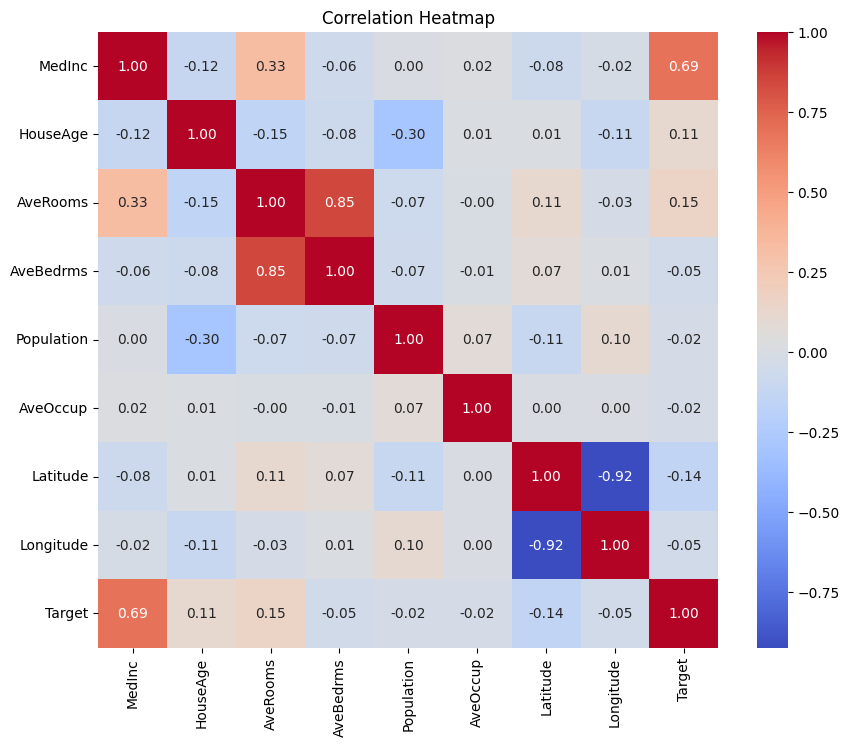

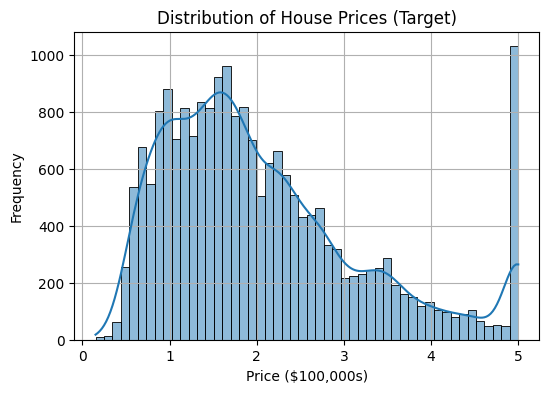

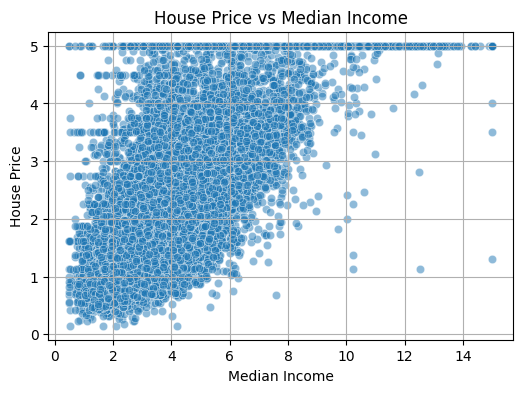


Simple Linear Regression:
MSE: 0.709, RMSE: 0.842, R² Score: 0.459


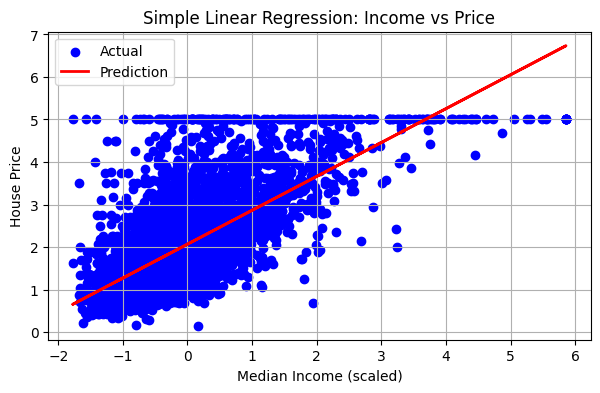


Multiple Linear Regression:
MSE: 0.556, RMSE: 0.746, R² Score: 0.576


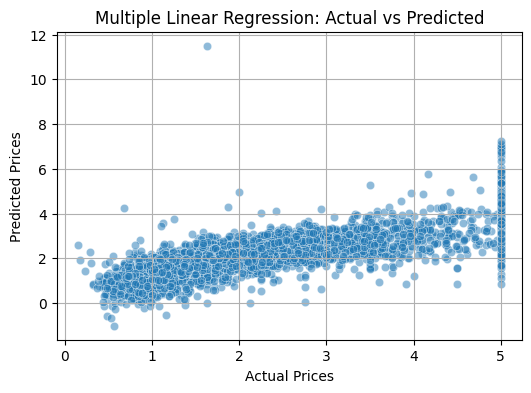

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Step 3: Dataset Exploration
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title('Distribution of House Prices (Target)')
plt.xlabel('Price ($100,000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of Target vs Median Income (strongest correlation)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['MedInc'], y=df['Target'], alpha=0.5)
plt.title('House Price vs Median Income')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.grid(True)
plt.show()

# Step 4: Data Preprocessing
df.dropna(inplace=True)  # just in case
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Target', axis=1))
X = pd.DataFrame(X_scaled, columns=data.feature_names)
y = df['Target']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Simple Linear Regression (using only MedInc)
X_train_simple = X_train[['MedInc']]
X_test_simple = X_test[['MedInc']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

# Step 7: Evaluate Simple Linear Regression
mse_s = mean_squared_error(y_test, y_pred_simple)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression:")
print(f"MSE: {mse_s:.3f}, RMSE: {rmse_s:.3f}, R² Score: {r2_s:.3f}")

# Step 8: Visualize Simple Regression
plt.figure(figsize=(7, 4))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Prediction')
plt.xlabel('Median Income (scaled)')
plt.ylabel('House Price')
plt.title('Simple Linear Regression: Income vs Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Multiple Linear Regression
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

# Step 10: Evaluate Multiple Linear Regression
mse_m = mean_squared_error(y_test, y_pred_multi)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test, y_pred_multi)

print("\nMultiple Linear Regression:")
print(f"MSE: {mse_m:.3f}, RMSE: {rmse_m:.3f}, R² Score: {r2_m:.3f}")

# Step 11: Visualize Predictions vs Actuals
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_multi, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()
